<a href="https://colab.research.google.com/github/ssp22/485Design-Project/blob/master/mass_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

[98.456157] [91.98943838] [3.08775377]
[98.45615703] [91.98943844] [3.08775371]
[98.45615703] [91.98943844] [3.08775371]
[98.45615706] [91.9894385] [3.08775365]
[98.45615706] [91.9894385] [3.08775365]
[98.45645543] [91.9900208] [3.08715643]
[98.45645543] [91.99002081] [3.08715642]
[98.45675168] [91.99059897] [3.08656344]
[98.45675169] [91.99059899] [3.08656343]
[98.45704584] [91.99117305] [3.08597466]
[98.45704585] [91.99117306] [3.08597464]
[98.45866285] [91.99432883] [3.08273803]
[98.45866294] [91.994329] [3.08273785]
[98.46021686] [91.99736164] [3.07962752]
[98.4602167] [91.99736134] [3.07962783]
[98.46170977] [92.00027521] [3.0766393]
[98.46170972] [92.00027511] [3.0766394]
[98.46314452] [92.00307526] [3.07376751]
[98.46314447] [92.00307517] [3.07376761]
[98.46571831] [92.00809827] [3.06861582]
[98.46571813] [92.00809791] [3.06861618]
[98.46810511] [92.01275632] [3.06383842]
[98.46810526] [92.01275662] [3.06383812]
[[0.032     ]
 [0.0318189 ]
 [0.03163886]
 [0.03145986]
 [0.0312819

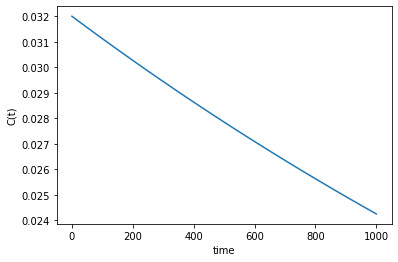

In [0]:
# Define parameters
dP = 40 # bar
dPi = 5.7 # bar
A = 5000 # cm^2 # membrane area
R = 0.1 # at 40 bar, 5C
k_w = 8.75 * 10 ** (-6) # g / (cm^2 s bar)
diff_P = dP - dPi
X = 0.05 # split ratio
# J_P_ref = 3 * 10 ** (-4) # g / cm^2 s 

# Initial conditions
m_0 = 10000 # g # initial batch feed
C_Et0 = 0.032 # weight percent
M_f = 100 # g / s # flow out of tank


def dCdt2(C_Et,t):
    # Define flow rates
    M_p1 = A * k_w * diff_P * (1 + C_Et * (1-R)) # 
    # M_p1 = A * J_P_ref
    M_r1 = M_f - M_p1
    C_r1 = (M_f * C_Et - M_p1 * (1-R) * C_Et) / M_r1
    M_p2 = A * k_w * diff_P * (1 + C_r1 * (1-R))
    # M_p2 = A * J_P_ref
    M_r2 = (1-X) * M_r1 - M_p2
    C_r2 = ((1-X)*M_r1*C_r1 - M_p2 * (1-R) * C_r1) / M_r2
    dCdt = (M_r1 * X * C_r1 + M_r2 * C_r2 - M_f * C_Et) / m_0
    M_water = M_p1 + M_p2
    print(M_r1,M_r2,M_water)
    return dCdt

t = np.linspace(0,1000)

# solve ODE
C = odeint(dCdt2,C_Et0,t)
print(C)



# plot results
plt.plot(t,C)
plt.xlabel('time')
plt.ylabel('C(t)')
plt.show()



In [0]:
a = 40